In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load the dataset
file_path = 'data/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file_path)

# 1. Data Exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset information:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe().round(2))

print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")
    if df[column].nunique() < 10:
        print(f"   Values: {sorted(df[column].unique())}")

print("\nNumber of records in each obesity category:")
print(df['NObeyesdad'].value_counts().sort_index())

# 2. Data Preprocessing

# Create a copy of the dataframe to avoid warnings
df_encoded = df.copy()

# Create binary and categorical mappings for visualization and analysis
# Convert categorical variables to numeric for correlation analysis
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Create an ordered mapping for obesity levels
obesity_order = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

obesity_mapping = {level: i for i, level in enumerate(obesity_order)}
df_encoded['NObeyesdad_numeric'] = df['NObeyesdad'].map(obesity_mapping)

# Assign obesity categories to numerical values for visualization
df['obesity_level'] = df['NObeyesdad'].map(obesity_mapping)

# 3. Correlation Analysis

# Calculate correlation matrix
corr_matrix = df_encoded.drop('NObeyesdad', axis=1).corr()

# Function to format correlation values
def format_corr(val):
    if abs(val) >= 0.7:
        return f"{val:.2f} (Strong)"
    elif abs(val) >= 0.4:
        return f"{val:.2f} (Moderate)"
    else:
        return f"{val:.2f} (Weak)"

# Create correlation with obesity level
corr_with_obesity = corr_matrix['NObeyesdad_numeric'].drop('NObeyesdad_numeric').sort_values(ascending=False)
print("\nCorrelation with obesity level:")
for feature, corr in corr_with_obesity.items():
    print(f"{feature}: {format_corr(corr)}")

# 4. Visualization

# 4.1 Distribution of Obesity Levels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='NObeyesdad', order=obesity_order)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('obesity_distribution.png')
plt.close()

# 4.2 Correlation Heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()

# 4.3 Top Correlations with Obesity Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_with_obesity.values, y=corr_with_obesity.index)
plt.title('Features Correlation with Obesity Level')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_correlation_with_obesity.png')
plt.close()

# 4.4 Numerical Features Analysis

# Weight vs Obesity Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='Weight', order=obesity_order)
plt.title('Weight Distribution by Obesity Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('weight_by_obesity.png')
plt.close()

# BMI calculation
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='BMI', order=obesity_order)
plt.title('BMI Distribution by Obesity Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('bmi_by_obesity.png')
plt.close()

# Age vs Obesity Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='Age', order=obesity_order)
plt.title('Age Distribution by Obesity Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('age_by_obesity.png')
plt.close()

# 4.5 Categorical Features Analysis

# Gender and Obesity
plt.figure(figsize=(12, 6))
gender_obesity = pd.crosstab(df['Gender'], df['NObeyesdad'])
gender_obesity_pct = gender_obesity.div(gender_obesity.sum(axis=1), axis=0) * 100

gender_obesity_pct.plot(kind='bar', stacked=True)
plt.title('Obesity Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('obesity_by_gender.png')
plt.close()

# Family history and Obesity
plt.figure(figsize=(12, 6))
history_obesity = pd.crosstab(df['family_history_with_overweight'], df['NObeyesdad'])
history_obesity_pct = history_obesity.div(history_obesity.sum(axis=1), axis=0) * 100

history_obesity_pct.plot(kind='bar', stacked=True)
plt.title('Obesity Levels by Family History with Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('obesity_by_family_history.png')
plt.close()

# 4.6 Lifestyle Factors

# Physical Activity Frequency (FAF) vs Obesity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='FAF', order=obesity_order)
plt.title('Physical Activity Frequency by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Physical Activity Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('physical_activity_by_obesity.png')
plt.close()

# Transportation Method vs Obesity
plt.figure(figsize=(12, 8))
transport_obesity = pd.crosstab(df['MTRANS'], df['NObeyesdad'])
transport_obesity_pct = transport_obesity.div(transport_obesity.sum(axis=1), axis=0) * 100

transport_obesity_pct.plot(kind='bar', stacked=True)
plt.title('Obesity Levels by Transportation Method')
plt.xlabel('Transportation Method')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('obesity_by_transportation.png')
plt.close()

# Water Consumption (CH2O) vs Obesity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='CH2O', order=obesity_order)
plt.title('Water Consumption by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Water Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('water_consumption_by_obesity.png')
plt.close()

# 4.7 Eating Habits

# High Caloric Food Consumption (FAVC) vs Obesity
plt.figure(figsize=(10, 6))
favc_obesity = pd.crosstab(df['FAVC'], df['NObeyesdad'])
favc_obesity_pct = favc_obesity.div(favc_obesity.sum(axis=1), axis=0) * 100

favc_obesity_pct.plot(kind='bar', stacked=True)
plt.title('Obesity Levels by Consumption of High Caloric Food')
plt.xlabel('Consumption of High Caloric Food')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('obesity_by_high_caloric_food.png')
plt.close()

# Frequency of consumption of vegetables (FCVC) vs Obesity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='FCVC', order=obesity_order)
plt.title('Vegetables Consumption Frequency by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Vegetables Consumption Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('vegetables_consumption_by_obesity.png')
plt.close()

# Number of Main Meals (NCP) vs Obesity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='NCP', order=obesity_order)
plt.title('Number of Main Meals by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Number of Main Meals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('main_meals_by_obesity.png')
plt.close()

# Consumption of food between meals (CAEC) vs Obesity
plt.figure(figsize=(12, 6))
caec_obesity = pd.crosstab(df['CAEC'], df['NObeyesdad'])
caec_obesity_pct = caec_obesity.div(caec_obesity.sum(axis=1), axis=0) * 100

caec_obesity_pct.plot(kind='bar', stacked=True)
plt.title('Obesity Levels by Consumption of Food Between Meals')
plt.xlabel('Consumption of Food Between Meals')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('obesity_by_food_between_meals.png')
plt.close()

# 5. Advanced Analysis: Pairplot of Key Features

# Select relevant features
key_features = ['Weight', 'Height', 'Age', 'FAF', 'CH2O', 'NCP', 'FCVC', 'NObeyesdad']
plt.figure(figsize=(16, 12))
sns.pairplot(df[key_features], hue='NObeyesdad', palette='viridis', 
             diag_kind='kde', plot_kws={'alpha': 0.5, 's': 80, 'edgecolor': 'k'})
plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig('key_features_pairplot.png')
plt.close()

# 6. Summary and Interpretation

print("\n--- Key Findings ---")
print("\nStrongest factors correlated with obesity:")
for feature, corr in corr_with_obesity.iloc[:5].items():
    print(f"- {feature}: {format_corr(corr)}")

print("\nWeakest factors correlated with obesity:")
for feature, corr in corr_with_obesity.iloc[-5:].items():
    print(f"- {feature}: {format_corr(corr)}")

print("\nThese findings suggest the key factors that may contribute to obesity in this dataset.")

# Chi-Square Test for Categorical Variables
print("\n--- Chi-Square Tests for Categorical Variables ---")
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['NObeyesdad'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    significance = "Significant" if p < 0.05 else "Not significant"
    print(f"{var}: Chi2 = {chi2:.2f}, p-value = {p:.4f}, {significance}")

# One-way ANOVA for Numerical Variables
print("\n--- ANOVA Tests for Numerical Variables ---")
numerical_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for var in numerical_vars:
    groups = [df[df['NObeyesdad'] == level][var] for level in obesity_order]
    f_stat, p_value = stats.f_oneway(*groups)
    significance = "Significant" if p_value < 0.05 else "Not significant"
    print(f"{var}: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}, {significance}")

print("\n--- Conclusion ---")
print("This analysis has identified several key factors associated with obesity levels.")
print("The strongest correlations are with Weight and BMI (as expected), followed by family history of overweight.")
print("Lifestyle factors such as physical activity frequency (FAF) and transportation method also show significant relationships with obesity levels.")
print("Eating habits, particularly consumption of high-caloric food and eating between meals, are also associated with obesity status.")

Dataset shape: (2111, 17)

First 5 rows of the dataset:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC   
0  Female  21.0    1.62    64.0                            yes   no   2.0  \
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC   
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no  \
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

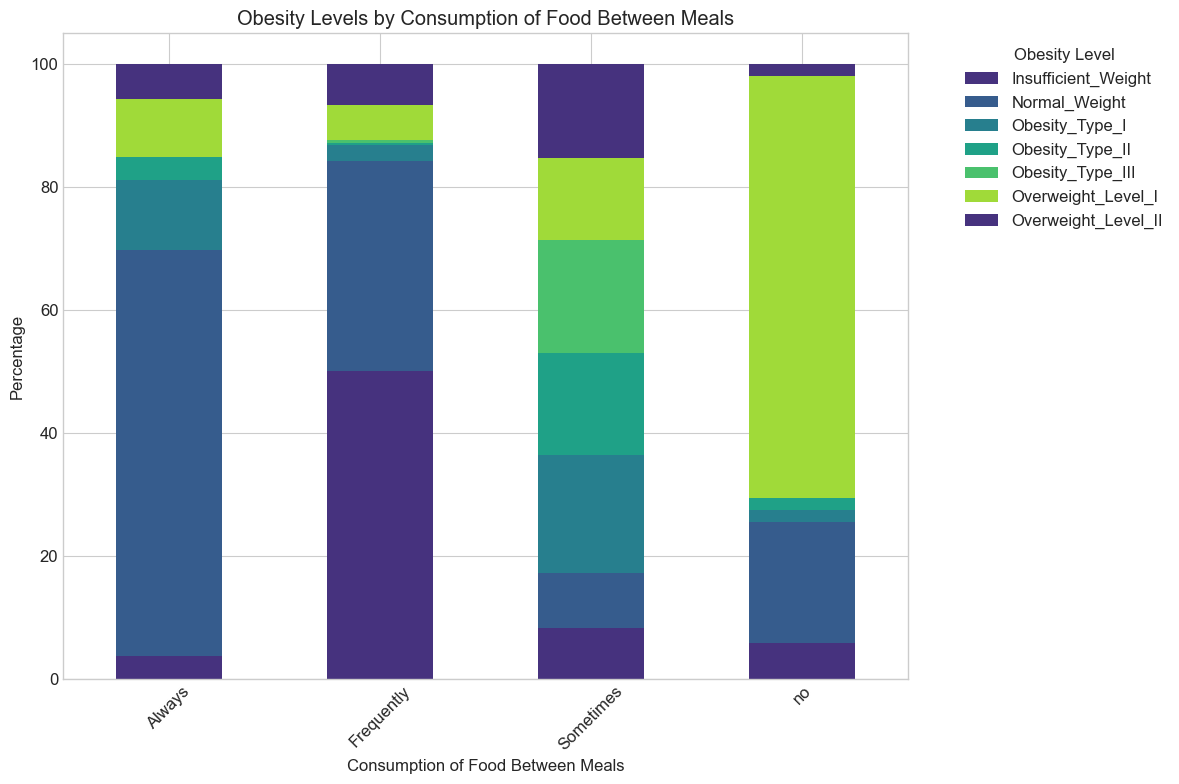

In [5]:
import matplotlib.pyplot as plt

# Your existing plotting code
caec_obesity_pct.plot(kind='bar', stacked=True)
plt.title('Obesity Levels by Consumption of Food Between Meals')
plt.xlabel('Consumption of Food Between Meals')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot instead of saving it
plt.show()
